<a href="https://colab.research.google.com/github/Haseebasif7/ML-Projects/blob/main/Sonar_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score

Data Collection / Pre-Processing

In [38]:
sonar_data=pd.read_csv('/content/sonar data.csv',header=None) # header=None means that 0th row is not coloumn name
sonar_data.head(10)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [3]:
sonar_data.shape

(208, 61)

In [4]:
sonar_data.describe() # statistical Data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
sonar_data.isnull().sum() #return the number of null values in each coloumn

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [9]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


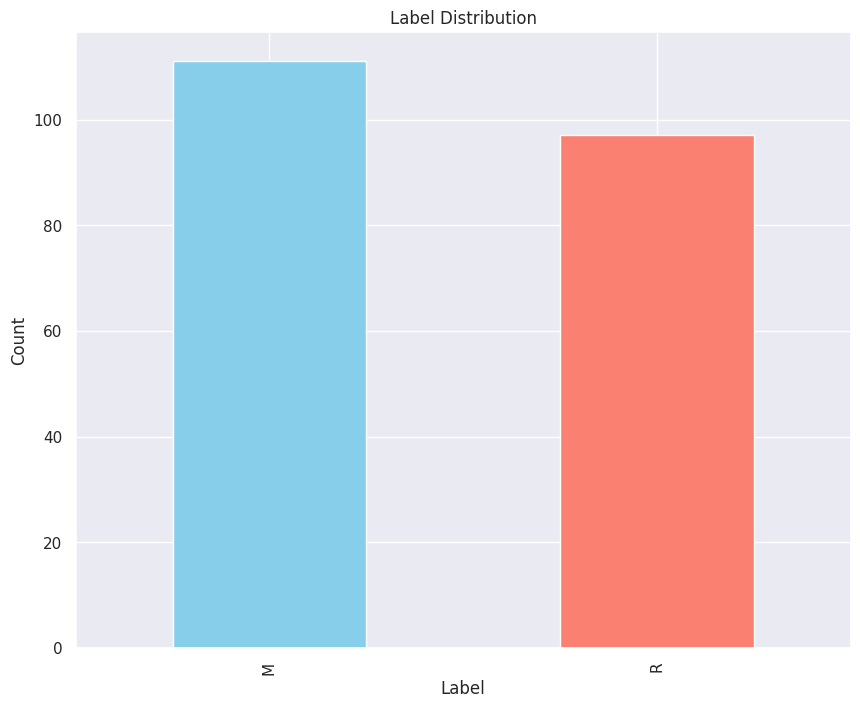

In [39]:
plt.figure(figsize=(10, 8))
sonar_data.iloc[:,-1].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

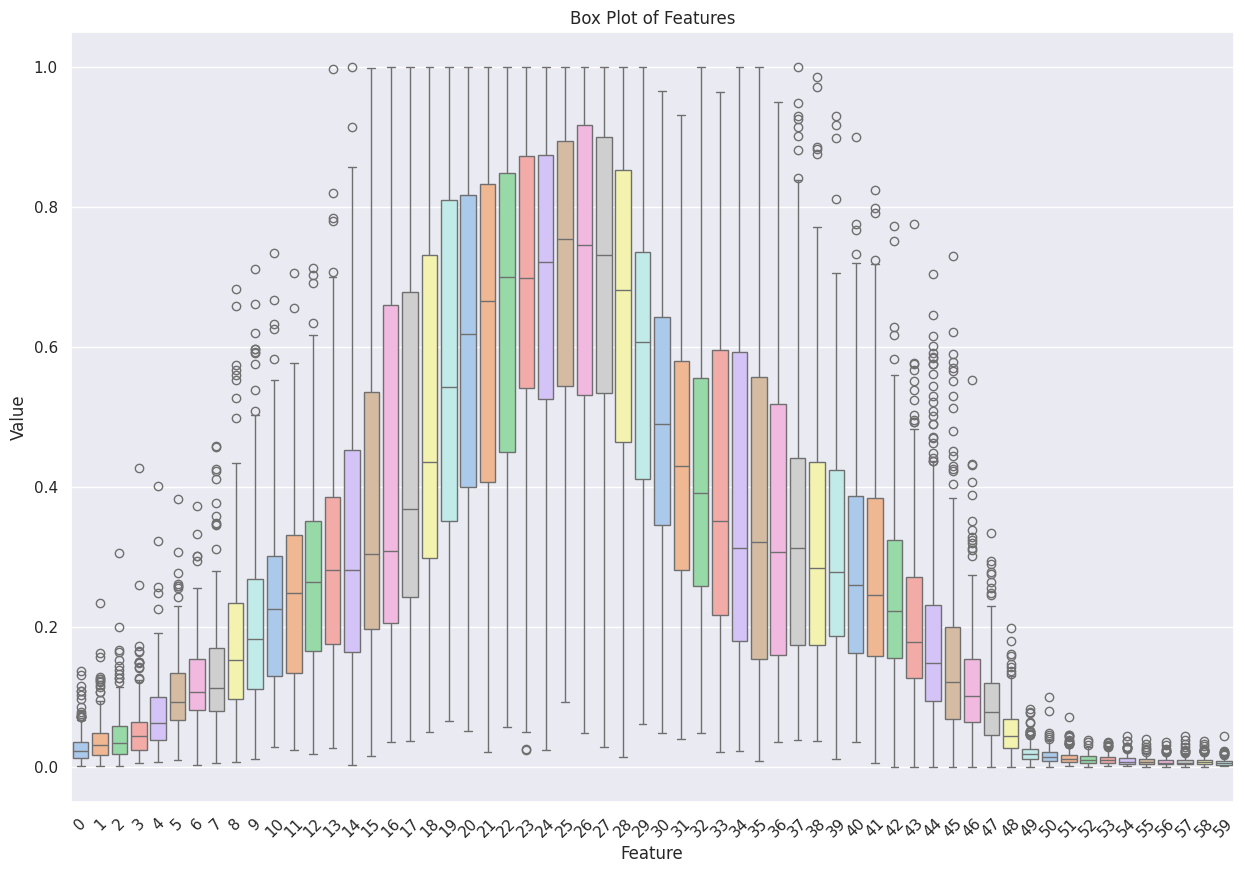

In [40]:
# Box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=sonar_data, palette='pastel')
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


Label Encoding

In [60]:
X=sonar_data.iloc[:,:-1] #seperating features
#Label Encoding (Converting categorical Data to Numerical)
Label_Encoder=LabelEncoder()
Y=Label_Encoder.fit_transform(sonar_data.iloc[:,-1])

Splitting into Training and Testing

In [68]:
#Spliting the Data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=7,stratify=Y)
# stratify ensures that the proportion of each class (label) is the same in both the training and test sets as it is in the original dataset.

In [69]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


Standardizing the Data

In [70]:
# Even if features are within the range of 0-1, standardizing them to have zero mean and unit variance can enhance numerical stability, ensure equal contribution of features,
# and improve the convergence of optimization algorithms.
scaler=StandardScaler()
X_train_standardized=scaler.fit_transform(X_train)
X_test_standardized=scaler.transform(X_test) # already fitted on train dataset

Fitting the Logistic Regression Model

In [71]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train_standardized,Y_train)
y_pred=model.predict(X_test_standardized)

Predicting the Model


In [75]:
accuracy=accuracy_score(Y_test,y_pred)
f1_score=f1_score(Y_test,y_pred)
confusion_matrix=confusion_matrix(Y_test,y_pred)
classification_report=classification_report(Y_test,y_pred)
print('Accuracy:',accuracy)
print('F1 Score:',f1_score)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification Report:\n',classification_report)

Accuracy: 0.8095238095238095
F1 Score: 0.8000000000000002
Confusion Matrix:
 [[9 2]
 [2 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.80      0.80      0.80        10

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21



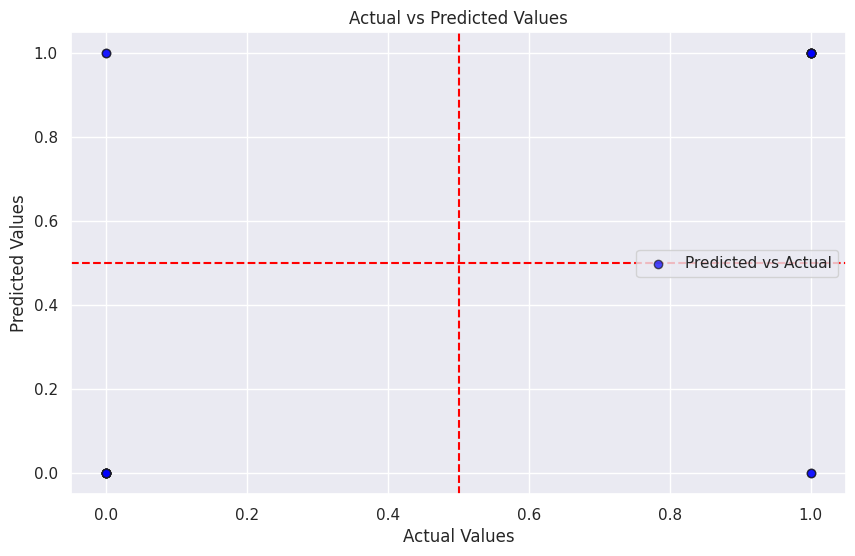

In [79]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.7, c='blue', label='Predicted vs Actual', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.axhline(y=0.5, color='red', linestyle='--')  # Adding a reference line at y=0.5 for binary classification
plt.axvline(x=0.5, color='red', linestyle='--')  # Adding a reference line at x=0.5 for binary classification
plt.legend()
plt.show()